In [ ]:
!unzip '/content/drive/MyDrive/traffic sign/Traffic sign classification/archive (1).zip'

Streaming output truncated to the last 5000 lines.
  inflating: train/5/00005_00053_00010.png  
  inflating: train/5/00005_00053_00011.png  
  inflating: train/5/00005_00053_00012.png  
  inflating: train/5/00005_00053_00013.png  
  inflating: train/5/00005_00053_00014.png  
  inflating: train/5/00005_00053_00015.png  
  inflating: train/5/00005_00053_00016.png  
  inflating: train/5/00005_00053_00017.png  
  inflating: train/5/00005_00053_00018.png  
  inflating: train/5/00005_00053_00019.png  
  inflating: train/5/00005_00053_00020.png  
  inflating: train/5/00005_00053_00021.png  
  inflating: train/5/00005_00053_00022.png  
  inflating: train/5/00005_00053_00023.png  
  inflating: train/5/00005_00053_00024.png  
  inflating: train/5/00005_00053_00025.png  
  inflating: train/5/00005_00053_00026.png  
  inflating: train/5/00005_00053_00027.png  
  inflating: train/5/00005_00053_00028.png  
  inflating: train/5/00005_00053_00029.png  
  inflating: train/5/00005_00054_00000.png  
  in

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [ ]:
data = []
labels = []
classes = 43
cur_path = "/content/"


#Retrieving the images and their labels 
for i in range(classes):
    path = os.path.join(cur_path,'train',str(i))
    images = os.listdir(path)

    for a in images:
        try:
            image = Image.open(path + '/'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            #sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")


In [ ]:
#Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)

print(data.shape, labels.shape)
#Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

(39209, 30, 30, 3) (39209,)


In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [ ]:
#Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

In [ ]:
#Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        2432      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 32)        25632     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 11, 11, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 64)          18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 64)          36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 3, 64)          0

In [ ]:
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 5
history = model.fit(X_train, y_train, batch_size=64, epochs=epochs, validation_data=(X_test, y_test))
model.save("my_model.h5")

Epoch 1/5
491/491 [==============================] - 144s 260ms/step - loss: 4.1697 - accuracy: 0.2743 - val_loss: 0.4773 - val_accuracy: 0.8906
Epoch 2/5
491/491 [==============================] - 128s 260ms/step - loss: 0.7407 - accuracy: 0.7895 - val_loss: 0.2054 - val_accuracy: 0.9455
Epoch 3/5
491/491 [==============================] - 126s 256ms/step - loss: 0.3885 - accuracy: 0.8900 - val_loss: 0.0912 - val_accuracy: 0.9784
Epoch 4/5
491/491 [==============================] - 125s 255ms/step - loss: 0.2756 - accuracy: 0.9223 - val_loss: 0.0822 - val_accuracy: 0.9778
Epoch 5/5
491/491 [==============================] - 125s 255ms/step - loss: 0.2734 - accuracy: 0.9267 - val_loss: 0.0694 - val_accuracy: 0.9811


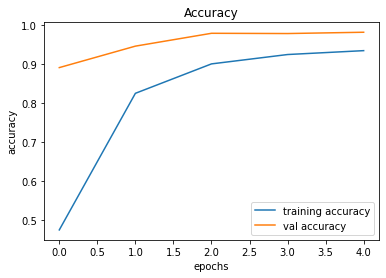

In [ ]:
#plotting graphs for accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

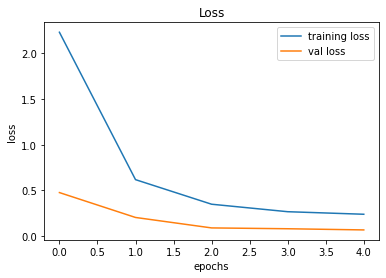

In [ ]:
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
#testing accuracy on test dataset
from sklearn.metrics import accuracy_score

y_test = pd.read_csv('/content/Test.csv')

labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data=[]

for img in imgs:
    path = '/content/'
    image = Image.open(path+img)
    image = image.resize((30,30))
    data.append(np.array(image))

X_test=np.array(data)

pred = model.predict_classes(X_test)

#Accuracy with the test data
from sklearn.metrics import accuracy_score
print(accuracy_score(labels, pred))

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


0.9533650039588282


In [ ]:
#importing confusion matrix
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(labels, pred)
print('Confusion Matrix\n')
print(confusion)

Confusion Matrix

[[ 57   2   0 ...   0   0   0]
 [  0 701   2 ...   0   0   0]
 [  0   4 742 ...   0   0   0]
 ...
 [  0   0   0 ...  80   0   0]
 [  0   0   0 ...   0  47   0]
 [  0   0   0 ...   0   0  86]]


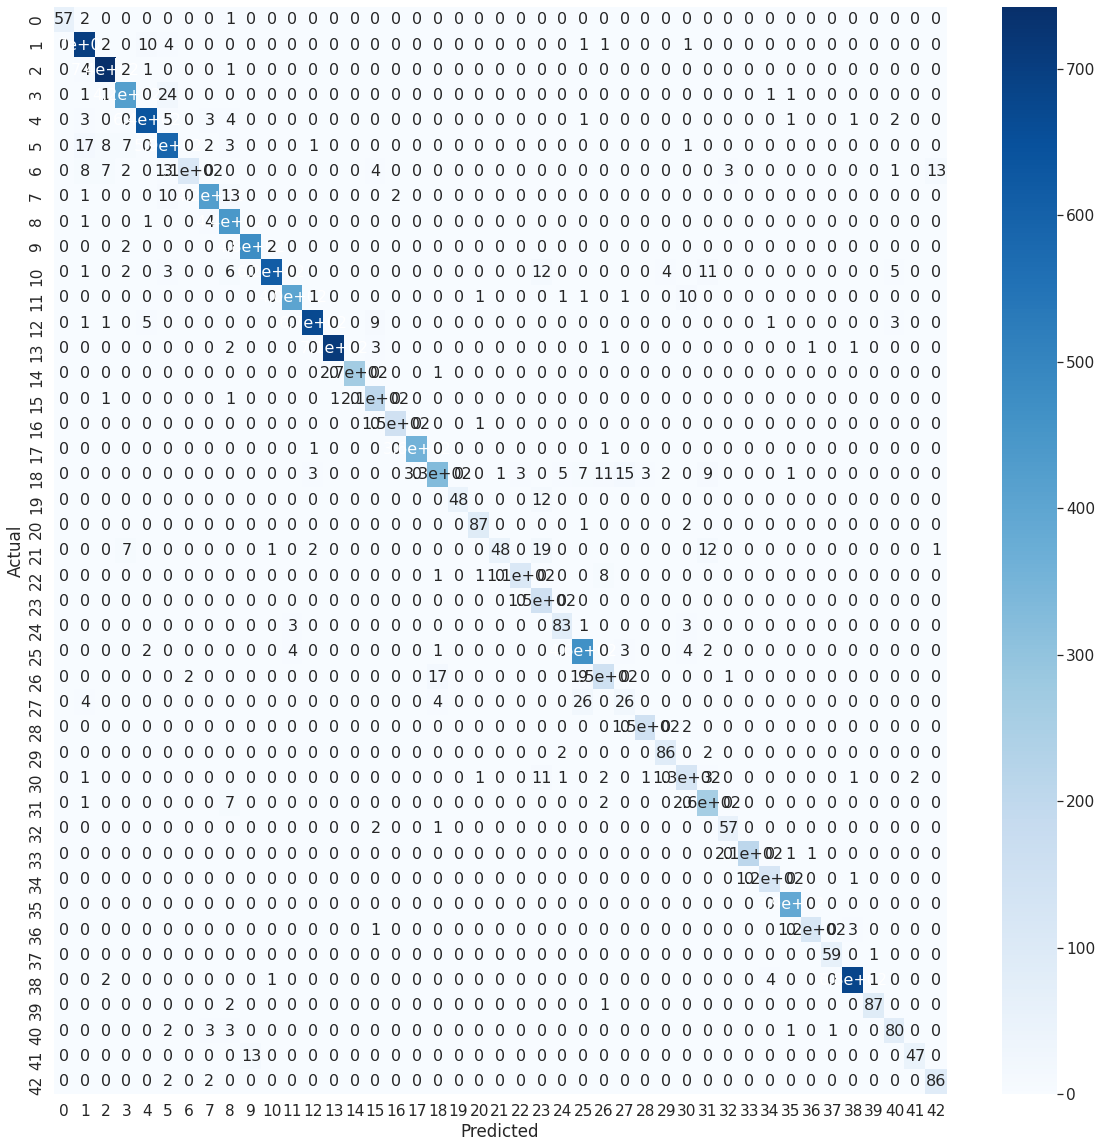

In [ ]:
import seaborn as sn
df_cm = pd.DataFrame(confusion, columns=np.unique(labels), index = np.unique(labels))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (20,20))
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size

In [ ]:
from sklearn.metrics import classification_report
ClassificationReport = classification_report(labels, pred)
print('Classification Report is : \n', ClassificationReport )

Classification Report is : 
               precision    recall  f1-score   support

           0       1.00      0.95      0.97        60
           1       0.94      0.97      0.96       720
           2       0.97      0.99      0.98       750
           3       0.95      0.94      0.94       450
           4       0.97      0.97      0.97       660
           5       0.92      0.94      0.93       630
           6       0.98      0.73      0.84       150
           7       0.97      0.94      0.95       450
           8       0.91      0.99      0.95       450
           9       0.97      0.99      0.98       480
          10       0.99      0.93      0.96       660
          11       0.98      0.96      0.97       420
          12       0.99      0.97      0.98       690
          13       1.00      0.99      0.99       720
          14       1.00      1.00      1.00       270
          15       0.92      0.99      0.95       210
          16       0.99      0.99      0.99       15

In [ ]:
#importing accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(labels, pred)))

print('Micro Precision: {:.2f}'.format(precision_score(labels, pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(labels, pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(labels, pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(labels, pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(labels, pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(labels, pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(labels, pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(labels, pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(labels, pred, average='weighted')))


Accuracy: 0.95

Micro Precision: 0.95
Micro Recall: 0.95
Micro F1-score: 0.95

Macro Precision: 0.94
Macro Recall: 0.92
Macro F1-score: 0.93

Weighted Precision: 0.95
Weighted Recall: 0.95
Weighted F1-score: 0.95


In [ ]:
from keras.layers import GlobalAveragePooling2D
from tensorflow.keras.models import Model
#build model
base_model=tf.keras.applications.mobilenet.MobileNet(weights='imagenet',include_top=False) #imports the mobilenet model and discards the last 1000 neuron layer.
base_model.trainable = False

x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x=Dense(1024,activation='relu')(x) #dense layer 2
x=Dense(512,activation='relu')(x) #dense layer 3
preds=Dense(43,activation='softmax')(x) #final layer with softmax activation
model_mobilenet=Model(inputs=base_model.input,outputs=preds)
#specify the inputs
#specify the outputs
#now a model has been created based on our architecture
model_mobilenet.summary()

17227776/17225924 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
conv1 (Conv2D)               (None, None, None, 32)    864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, None, None, 32)    128       
_________________________________________________________________
conv1_relu (ReLU)            (None, None, None, 32)    0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, None, None, 32)    288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, None, None, 32)    128       
______________________________________________________________

In [ ]:
model_mobilenet.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
# Adam optimizer
# loss function will be categorical cross entropy
# evaluation metric will be accuracy

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale=1./255,           # rescale pixel values [0,255] to [0,1]
        horizontal_flip=True,     # random horizontal flip
        width_shift_range=0.2,    # random shift images horizontally (fraction of total width)
        height_shift_range=0.2,   # random shift images vertically (fraction of total height)
        zoom_range=0.2)           

In [ ]:
train_generator=train_datagen.flow_from_directory('/content/train',
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 shuffle=True)

Found 39209 images belonging to 43 classes.


In [ ]:
step_size_train= train_generator.n // train_generator.batch_size
history_mobilenet=model_mobilenet.fit_generator(generator=train_generator,
                   steps_per_epoch=step_size_train,
                   epochs=5)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
1225/1225 [==============================] - 1756s 1s/step - loss: 1.1480 - accuracy: 0.6470
Epoch 2/5
 879/1225 [====================>.........] - ETA: 8:15 - loss: 0.3996 - accuracy: 0.8664

In [ ]:
pretrained_model = tf.keras.applications.mobilenet.MobileNet(
        weights='imagenet',
        include_top=False 
    )
pretrained_model.trainable = False

17227776/17225924 [==============================] - 0s 0us/step


In [ ]:
from keras.models import Sequential
from keras.layers import GlobalAveragePooling2D
model_2 = tf.keras.Sequential([
       pretrained_model, 
       GlobalAveragePooling2D(),
       Dense(1024,activation='relu'),
       Dense(512,activation='relu'),
       Dense(43, activation='softmax')
    ])
model_2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_1.00_224 (Function (None, None, None, 1024)  3228864   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              1049600   
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_2 (Dense)              (None, 43)                22059     
Total params: 4,825,323
Trainable params: 1,596,459
Non-trainable params: 3,228,864
_________________________________________________________________


In [ ]:
model_2.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
step_size_train= train_generator.n // train_generator.batch_size
history_2=model_2.fit_generator(generator=train_generator,
                   steps_per_epoch=step_size_train,
                   epochs=5)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
1225/1225 [==============================] - 1931s 2s/step - loss: 1.0385 - accuracy: 0.6842
Epoch 2/5
1225/1225 [==============================] - 1936s 2s/step - loss: 0.3345 - accuracy: 0.8841
Epoch 3/5
1225/1225 [==============================] - 1932s 2s/step - loss: 0.2563 - accuracy: 0.9112
Epoch 4/5
1225/1225 [==============================] - 1947s 2s/step - loss: 0.2282 - accuracy: 0.9218
Epoch 5/5
1225/1225 [==============================] - 1963s 2s/step - loss: 0.2011 - accuracy: 0.9316


In [ ]:
model_2.save("my_model2.h5")

In [ ]:
#testing accuracy on test dataset
from sklearn.metrics import accuracy_score

y_test = pd.read_csv('/content/Test.csv')

labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data=[]

for img in imgs:
    path = '/content/'
    image = Image.open(path+img)
    image = image.resize((224,224))
    data.append(np.array(image))

X_test=np.array(data)

pred = model_2.predict_classes(X_test)
#Accuracy with the test data
from sklearn.metrics import accuracy_score
print(accuracy_score(labels, pred))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


0.025890736342042756
